### Jordan Bramble

### Homework 5

#### 6.8 problem 2

##### b.

iii. is true.  less flexible, so as variance decreases, and bias increases less. we get better prediction accuracy

#### 6.8 problem 3

##### a.

iv. training RSS will decrease to OLS values

#### b.

ii. increasing s will give us better "feature selection", up to an optimal point, and then we will start minimizing important features and losing "information"

#### c. 

iii. when s = 0 there should be no variance. as s increases, more betas are becoming non-zero and thus variance should increase

#### 6.8 problem 9

In [3]:
library(ISLR)

##### a. 

In [5]:
train.size = dim(College)[1] / 2
train = sample(1:dim(College)[1], train.size)
test = -train
train = College[train, ]
test = College[test, ]

##### b. 

In [7]:
fit = lm(Apps~., data=train)
pred = predict(fit, test)
mean((test[, "Apps"] - pred)^2)

[1] 1725932

#### c. 

In [2]:
library(glmnet)

Warning message:
: package ‘glmnet’ was built under R version 3.2.4Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [10]:
grid=10^seq(10,-2,length=100)
x = model.matrix(Apps~., data=train)
y = train$Apps

ridge = cv.glmnet(x,y,alpha=0,lambda=grid)
pred = predict(ridge, 
                     newx=model.matrix(Apps~., data=test), 
                     s=ridge$lambda.min)
mean((test$Apps - pred)^2)

[1] 1804809

In [12]:
ridge$lambda.min

[1] 18.73817

#### d. 

In [13]:
lasso = cv.glmnet(x, y, alpha=1, lambda=grid, thresh=1e-12)
lambda = lasso$lambda.min
lambda

[1] 10.72267

In [15]:
pred = predict(lasso, newx=model.matrix(Apps~., data=test, s=lambda))
mean((test[, "Apps"] - pred)^2)

[1] 2184011

#### 6.8 Problem 11

##### a. 

In [1]:
library(MASS)
library(leaps)

In [3]:
Boston$crim = log10(as.numeric(Boston$crim))

In [4]:
Boston.bestsubset = regsubsets(crim~.,data=Boston)

ERROR: Error in file(con, "rb"): cannot open the connection


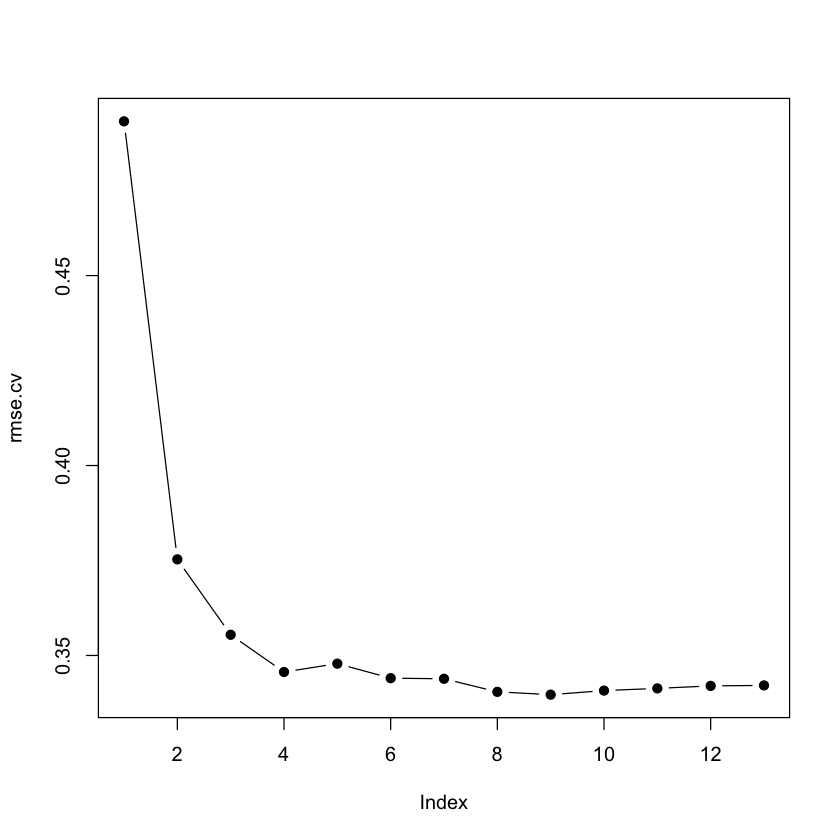

In [14]:
predict.regsubsets = function(object, newdata, id, ...) {
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coeff = coef(object, id = id)
    mat[, names(coeff)] %*% coeff
}

k = 10
cols = ncol(Boston) - 1
folds = sample(rep(1:k, length = nrow(Boston)))
cv.errors = matrix(NA, k, cols)
for (i in 1:k) {
    best.fit = regsubsets(crim ~ ., data = Boston[folds != i, ], nvmax = cols)
    for (j in 1:p) {
        pred = predict(best.fit, Boston[folds == i, ], id = j)
        cv.errors[i, j] = mean((Boston$crim[folds == i] - pred)^2)
    }
}
rmse.cv = sqrt(apply(cv.errors, 2, mean))
plot(rmse.cv, pch = 19, type = "b")


ERROR: Error in file(con, "rb"): cannot open the connection


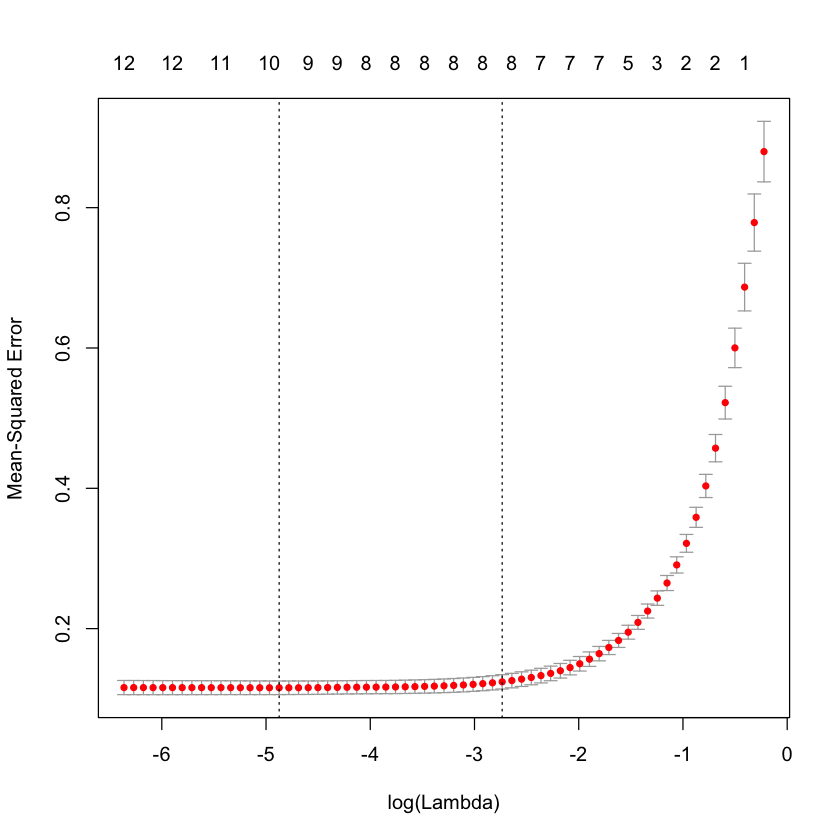

In [15]:
x = model.matrix(crim ~ . - 1, data = Boston)
y = Boston$crim
l = cv.glmnet(x, y, type.measure = "mse")
plot(l)

#### b.

Lasso preforms really well when log(lambda) is less than -3. for best subset selection around 9 columns is when we get the best.